In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("./data/set_b.csv")
df.head()

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN


In [2]:
df.shape

(656, 4)

In [3]:
df.describe()

,dataset,fname,label,sublabel
count,656,656,461,149
unique,1,656,3,2
top,b,set_b/Bunlabelledtest_231_1308748318393_B.wav,normal,noisynormal
freq,656,1,320,120


In [4]:
df.label.unique()

array(['extrastole', 'murmur', 'normal', nan], dtype=object)

In [5]:
df = df[pd.notnull(df["label"])]

df.shape

(461, 4)

In [6]:
df.label.unique()

array(['extrastole', 'murmur', 'normal'], dtype=object)

In [7]:
for i, _ in df.iterrows():
    path = df.ix[i, "fname"]
    path = path.replace("Btraining_", "")
    
    first_ind = path.find(df.ix[i, "label"])
    
    path = "./data/wav/" + path[first_ind:]
    
    if pd.isnull(df.ix[i, "sublabel"]):
        final_ind = path.find("_")

        path = path[:final_ind] + "_" + path[final_ind:]

    df.ix[i, "fname"] = path

/home/svganesh/.pyenv/versions/3.5.3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [8]:
df.head()

,dataset,fname,label,sublabel
0,b,./data/wav/extrastole__127_1306764300147_C2.wav,extrastole,NaN
1,b,./data/wav/extrastole__128_1306344005749_A.wav,extrastole,NaN
2,b,./data/wav/extrastole__130_1306347376079_D.wav,extrastole,NaN
3,b,./data/wav/extrastole__134_1306428161797_C1.wav,extrastole,NaN
4,b,./data/wav/extrastole__138_1306762146980_B.wav,extrastole,NaN


In [9]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline


ind = df[df.label == "normal"].first_valid_index()

def graph_spectrogram(wav_file, save_png=False):
    window_size_sec = 0.75
    window_shift_sec = 0.01
    sample_rate = 200
    data, sampling_rate = librosa.core.load(wav_file, sr=sample_rate, mono=True)
    win_length = int(sample_rate * window_size_sec)
    hop_length = int(sample_rate * window_shift_sec)
    n_fft = win_length # must be >= win_length
    spectrogram = librosa.core.stft(data, n_fft=n_fft, hop_length=hop_length, win_length=win_length)
    ax = librosa.display.specshow(spectrogram)
    
    if save_png:
        plt.axis("off")
        plt.savefig(wav_file.replace("wav", "png"),
                    dpi=100, # Dots per inch
                    frameon=False,
                    aspect="normal",
                    bbox_inches="tight",
                    pad_inches=0) # Spectrogram saved as a .png
        plt.close("all")
    else:
        ax.plot()

def get_wav_info(wav_file):
    rate, data = wavfile.read(wav_file)
    return rate, data

/home/svganesh/.pyenv/versions/3.5.3/lib/python3.5/site-packages/librosa/display.py:657: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


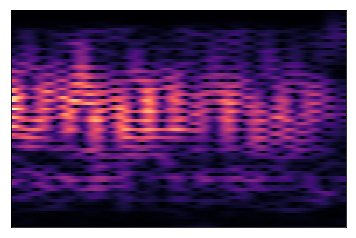

In [10]:
import IPython
from matplotlib import pyplot as plt
%matplotlib inline

ind = df[df.label == "normal"].first_valid_index()
graph_spectrogram(df.ix[ind, "fname"])

IPython.display.Audio(df.ix[ind, "fname"])

/home/svganesh/.pyenv/versions/3.5.3/lib/python3.5/site-packages/librosa/display.py:657: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


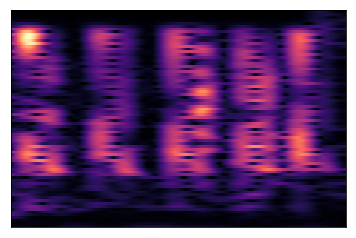

In [11]:
ind = df[df.label == "murmur"].first_valid_index()
graph_spectrogram(df.ix[ind, "fname"])


IPython.display.Audio(df.ix[ind, "fname"])

/home/svganesh/.pyenv/versions/3.5.3/lib/python3.5/site-packages/librosa/display.py:657: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


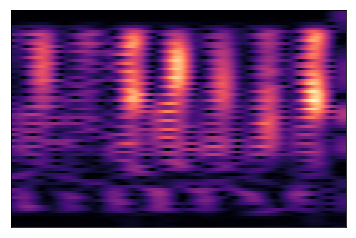

In [12]:
ind = df[df.label == "extrastole"].first_valid_index()
graph_spectrogram(df.ix[ind, "fname"])


IPython.display.Audio(df.ix[ind, "fname"])

In [13]:
from PIL import Image

graph_spectrogram(df.ix[ind, "fname"], True)

Image.open(df.ix[ind, "fname"].replace("wav", "png")).size

/home/svganesh/.pyenv/versions/3.5.3/lib/python3.5/site-packages/librosa/display.py:657: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn('Trying to display complex-valued input. '


(472, 309)

In [14]:
from PIL import ImageChops

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    
    if bbox:
        return im.crop(bbox)

In [15]:
im = Image.open(df.ix[0, "fname"].replace("wav", "png"))
im = trim(im)
im.save(df.ix[0, "fname"].replace("wav", "png"))

global_size = Image.open(df.ix[ind, "fname"].replace("wav", "png")).size

In [16]:
df.ix[509, :].fname

'./data/wav/murmur_noisymurmur_135_1306428972976_C.wav'

In [17]:
print(df.ix[509, "fname"])

./data/wav/murmur_noisymurmur_135_1306428972976_C.wav


In [18]:
import time
import os.path

gen = False

for i, _ in df.iterrows():
    path = df.ix[i, "fname"].replace("wav", "png")
    df.ix[i, "iname"] = path

    if not os.path.isfile(path):
        gen = True
        graph_spectrogram(df.ix[i, "fname"], True)

        im = trim(Image.open(path))
        im.save(path)

        if im.size != global_size:
            print("Variable Image Size: " + str(i) + ", " + str(im.size) + ", " + str(global_size))

    time.sleep(0.05)

if not gen:
    print("... already generated previously ...")

... already generated previously ...


In [19]:
map = {
    "normal": 0,
    "murmur": 1
}

o_df = df

df = pd.DataFrame()
df["image"] = o_df["iname"]
df["label"]  = o_df["label"]

df.head()

,image,label
0,./data/png/extrastole__127_1306764300147_C2.png,extrastole
1,./data/png/extrastole__128_1306344005749_A.png,extrastole
2,./data/png/extrastole__130_1306347376079_D.png,extrastole
3,./data/png/extrastole__134_1306428161797_C1.png,extrastole
4,./data/png/extrastole__138_1306762146980_B.png,extrastole


In [ ]:
df = df[df.label != "extrastole"]

for i, _ in df.iterrows():
    df.ix[i, "label"] = map[df.ix[i, "label"]]

df.head()

/home/svganesh/.pyenv/versions/3.5.3/lib/python3.5/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


,image,label
46,./data/png/murmur__112_1306243000964_A.png,1
47,./data/png/murmur__112_1306243000964_B.png,1
48,./data/png/murmur__112_1306243000964_D.png,1
49,./data/png/murmur__116_1306258689913_A.png,1
50,./data/png/murmur__116_1306258689913_C.png,1


In [ ]:
from keras.preprocessing.image import img_to_array, load_img
from keras.utils import to_categorical

df = df.sample(frac=1).reset_index(drop=True)

X = np.array([])
Y = np.array([])

for _, row in r_df.iterrows():
    img = load_img(row.image)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    if X.size == 0:
        X = x
    else:
        X = np.vstack([X, x])

    y = np.asarray([row.label])
    y.reshape((1,) + y.shape)

    if Y.size == 0:
        Y = y
    else:
        Y = np.vstack([Y, y])

Y = to_categorical(Y)

Using TensorFlow backend.


In [ ]:
X.head()

In [ ]:
Y.head()

In [ ]:
# from keras.models import Sequential
# from keras.layers.core import Dense, Activation, Flatten
# from keras.layers.convolutional import Convolution2D
# from keras.layers.pooling import MaxPooling2D
# from keras.layers.normalization import BatchNormalization
# from keras.optimizers import SGD, Adam

# model = Sequential([
#     Convolution2D(62, (3, 3), activation="relu", input_shape=(302, 465, 3)),
#     MaxPooling2D((3, 3)),
#     Convolution2D(32, (3, 3), activation="relu"),
#     MaxPooling2D((3, 3)),
#     Convolution2D(16, (3, 3), activation="relu"),
#     MaxPooling2D((3, 3)),
#     Dense(8, kernel_initializer="normal"),
#     Dense(1, activation="sigmoid")
# ])

# model.compile(loss="categorical_crossentropy", optimizer=Adam(0.001), metrics=["accuracy"])

In [ ]:
# model.fit(X, Y, epochs=100, shuffle=True, validation_split=0.2, verbose=2)